In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data =pd.read_csv("/content/daily-website-visitors.csv")

In [ ]:
data

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,NaN,897.384615,841.558442,152.0
1,2,Monday,2,9/15/2014,NaN,897.384615,841.558442,231.0
2,3,Tuesday,3,9/16/2014,NaN,897.384615,841.558442,278.0
3,4,Wednesday,4,9/17/2014,NaN,897.384615,841.558442,287.0
4,5,Thursday,5,9/18/2014,NaN,897.384615,841.558442,236.0
...,...,...,...,...,...,...,...,...
2080,2163,Saturday,7,8/15/2020,NaN,897.384615,841.558442,323.0
2081,2164,Sunday,1,8/16/2020,NaN,897.384615,841.558442,351.0
2082,2165,Monday,2,8/17/2020,NaN,897.384615,841.558442,457.0
2083,2166,Tuesday,3,8/18/2020,NaN,897.384615,841.558442,499.0


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Row                     0
Day                     0
Day.Of.Week             0
Date                    0
Page.Loads           2085
Unique.Visits           0
First.Time.Visits       0
Returning.Visits        0
dtype: int64


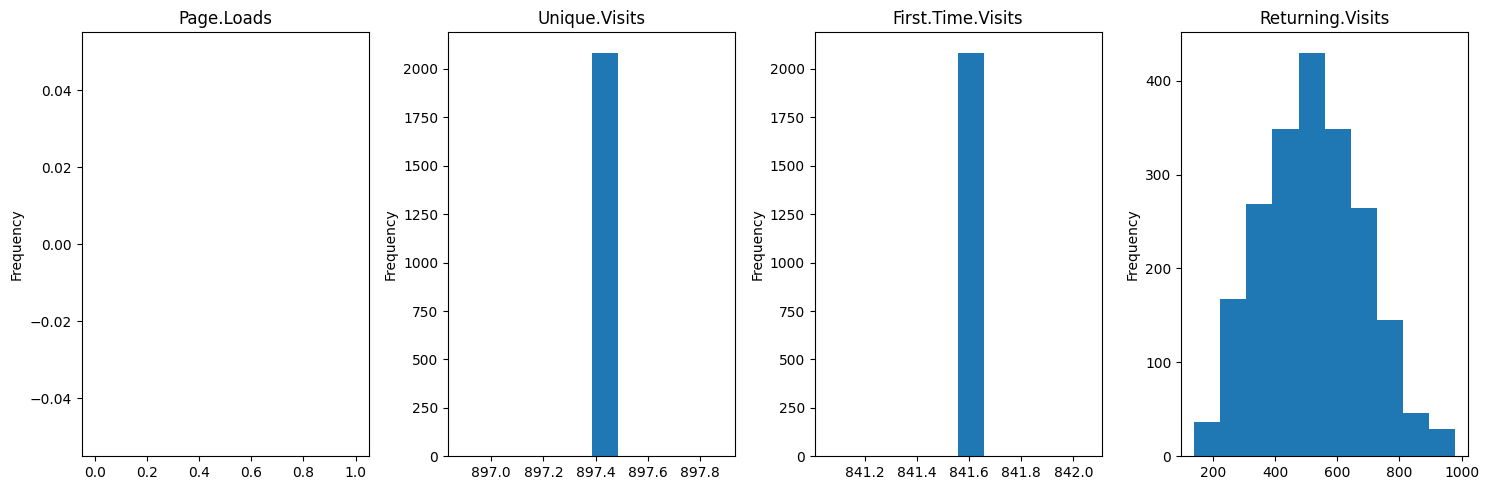

In [ ]:
import matplotlib.pyplot as plt

# Create subplots for each column with missing values
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Plot histograms for page.load, unique.visits, first.time.visits , return.visits
data['Page.Loads'].plot(kind='hist', ax=axes[0], title='Page.Loads')
data['Unique.Visits'].plot(kind='hist', ax=axes[1], title='Unique.Visits')
data['First.Time.Visits'].plot(kind='hist', ax=axes[2], title='First.Time.Visits')
data['Returning.Visits'].plot(kind='hist', ax=axes[3], title='Returning.Visits')


plt.tight_layout()
plt.show()


In [ ]:
# Fill missing values with mean
data['Page.Loads'].fillna(data['Page.Loads'].mean(), inplace=True)
data['Unique.Visits'].fillna(data['Unique.Visits'].mean(), inplace=True)
data['First.Time.Visits'].fillna(data['First.Time.Visits'].mean(), inplace=True)
data['Returning.Visits'].fillna(data['Returning.Visits'].mean(), inplace=True)

# Verify that there are no more missing values
missing_values_after_filling = data.isnull().sum()
print(missing_values_after_filling)

Row                     0
Day                     0
Day.Of.Week             0
Date                    0
Page.Loads           2085
Unique.Visits           0
First.Time.Visits       0
Returning.Visits        0
dtype: int64


In [ ]:
import numpy as np
import pandas as pd

# Define a function to detect outliers using IQR
def detect_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Specify the numeric columns to detect outliers
numeric_columns = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']

# Convert columns to numeric data type (if needed)
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Apply outlier detection to each numerical column separately
outliers = data[numeric_columns].apply(detect_outliers)

# Print the number of outliers for each column
print(outliers.sum())


Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     3
dtype: int64


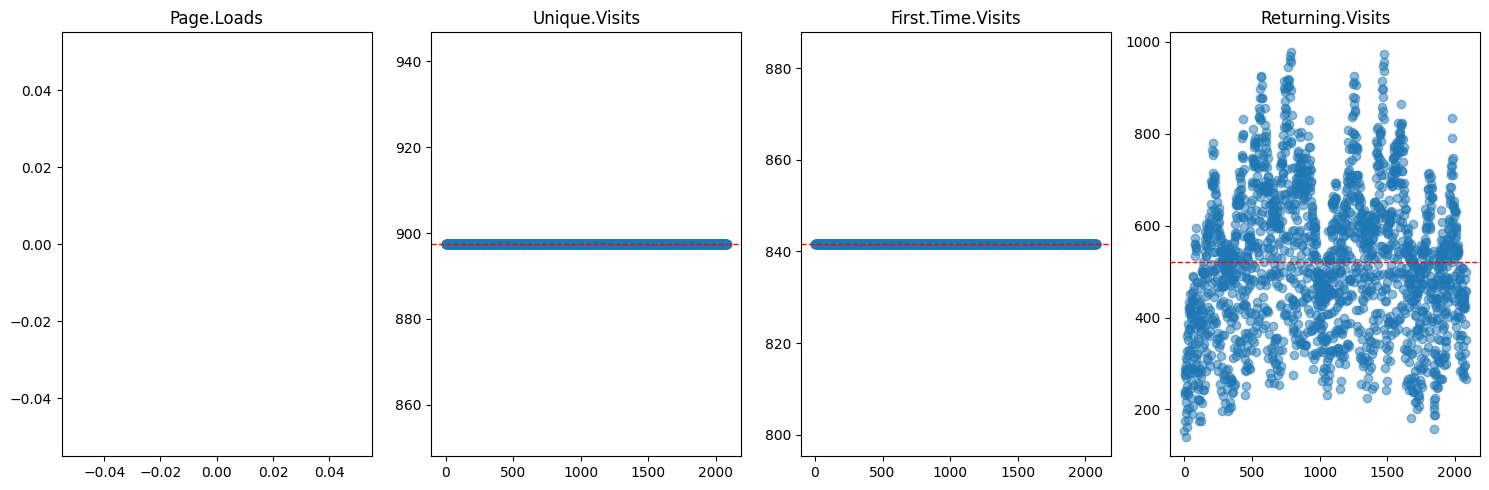

In [ ]:
# Calculate mean values
mean_Page_Loads = data['Page.Loads'].mean()
mean_Unique_Visits = data['Unique.Visits'].mean()
mean_First_Time_Visits = data['First.Time.Visits'].mean()
mean_Returing_Visits = data['Returning.Visits'].mean()

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Plot scatter plots for page.load, unique.visits, first.time.visits , return.visits  against index
axes[0].scatter(data.index, data['Page.Loads'], alpha=0.5)
axes[0].axhline(mean_Page_Loads, color='red', linestyle='dashed', linewidth=1)
axes[0].set_title('Page.Loads')

axes[1].scatter(data.index, data['Unique.Visits'], alpha=0.5)
axes[1].axhline(mean_Unique_Visits, color='red', linestyle='dashed', linewidth=1)
axes[1].set_title('Unique.Visits')

axes[2].scatter(data.index, data['First.Time.Visits'], alpha=0.5)
axes[2].axhline(mean_First_Time_Visits, color='red', linestyle='dashed', linewidth=1)
axes[2].set_title('First.Time.Visits')

axes[3].scatter(data.index, data['Returning.Visits'], alpha=0.5)
axes[3].axhline(mean_Returing_Visits, color='red', linestyle='dashed', linewidth=1)
axes[3].set_title('Returning.Visits')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Define a function to detect outliers using IQR
def detect_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Apply outlier detection to numerical columns (page.load, unique.visits, first.time.visits , return.visits)
outliers_page_loads = detect_outliers(data['Page.Loads'])
outliers_uniqus_visits = detect_outliers(data['Unique.Visits'])
outliers_first_time_visits = detect_outliers(data['First.Time.Visits'])
outliers_returning_visits= detect_outliers(data['Returning.Visits'])

# Remove outliers
data = data[~(outliers_page_loads | outliers_uniqus_visits  | outliers_first_time_visits | outliers_returning_visits )]

# Reset index after removing rows
data.reset_index(drop=True, inplace=True)

# Verify that outliers are removed

In [ ]:
print(f'Number of rows after removing outliers: {data.shape[0]}')

Number of rows after removing outliers: 2082


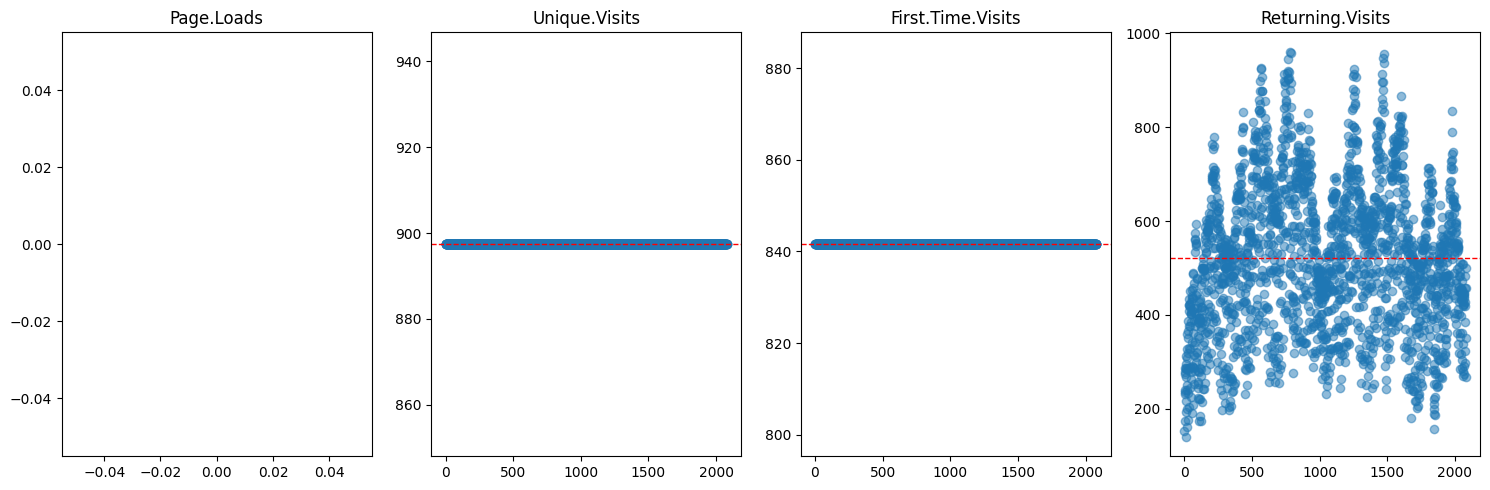

In [ ]:
# Calculate mean values
mean_page_loads = data['Page.Loads'].mean()
mean_uniqus_visits = data['Unique.Visits'].mean()
mean_first_time_visits = data['First.Time.Visits'].mean()
mean_returning_visits = data['Returning.Visits'].mean()

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Plot scatter plots for page.load, unique.visits, first.time.visits , return.visits against index
axes[0].scatter(data.index, data['Page.Loads'], alpha=0.5)
axes[0].axhline(mean_page_loads, color='red', linestyle='dashed', linewidth=1)
axes[0].set_title('Page.Loads')

axes[1].scatter(data.index, data['Unique.Visits'], alpha=0.5)
axes[1].axhline(mean_uniqus_visits, color='red', linestyle='dashed', linewidth=1)
axes[1].set_title('Unique.Visits')

axes[2].scatter(data.index, data['First.Time.Visits'], alpha=0.5)
axes[2].axhline(mean_first_time_visits, color='red', linestyle='dashed', linewidth=1)
axes[2].set_title('First.Time.Visits')

axes[3].scatter(data.index, data['Returning.Visits'], alpha=0.5)
axes[3].axhline(mean_returning_visits, color='red', linestyle='dashed', linewidth=1)
axes[3].set_title('Returning.Visits')

plt.tight_layout()
plt.show()


In [ ]:
data=data.to_csv('/content/daily-website-visitors.csv', index=False)

In [ ]:
print(data)


None


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Extract the year from the 'Date' column and create a new 'Year' column
data['Year'] = data['Date'].data.year

# Convert the 'Returning.Visits' column to string and then to numeric values
data['Returning.Visits'] = data['Returning.Visits'].astype(str).str.replace(',', '', regex=True).astype(float)

# Group the data by year and calculate the sum of 'Returning.Visits'
yearly_data = data.groupby('Year')['Returning.Visits'].sum()

# Plot the time series of total returning visits by year
plt.figure(figsize=(12, 6))
yearly_data.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Returning Visits')
plt.title('Total Returning Visits Over Time (by Year)')
plt.grid(True)
plt.show()

In [ ]:
# Assuming the 'Returning.Visits' column contains strings of numbers separated by commas
# Convert the strings to a list of numbers, and then calculate the mean

data['Returning.Visits'] = data['Returning.Visits'].str.split(',').apply(lambda x: [float(val) for val in x])
data['Returning.Visits'] = data['Returning.Visits'].apply(lambda x: sum(x) / len(x) if x else 0)

# Group the data by 'Day' and calculate the mean of 'Returning.Visits'
day_of_week_segments = data.groupby('Day')['Returning.Visits'].mean()

# Plot the user segmentation
day_of_week_segments.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Returning Visits')
plt.title('User Segmentation by Day of the Week')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = data[['Day.Of.Week']]
y = data['Returning.Visits']

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Visualize the predictions
plt.scatter(data['Day.Of.Week'], y, label='Actual')
plt.plot(data['Day.Of.Week'], predictions, color='red', label='Predicted')
plt.xlabel('Day of the Week')
plt.ylabel('Returning Visits')
plt.legend()
plt.title('Linear Regression Predictions')
plt.show()